In [10]:
import tensorflow as tf
import matplotlib as mpl

In [11]:
myLayer = tf.keras.layers.Lambda(lambda x: tf.abs(x))

Model 2.1: I will now add more layers and edit the learning rate to try and fix the slight overfitting from model 1.3

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 784)               0         
                                                                 
 dense_56 (Dense)            (None, 300)               235500    
                                                                 
 batch_normalization_8 (Bat  (None, 300)               1200      
 chNormalization)                                                
                                                                 
 dense_57 (Dense)            (None, 250)               75250     
                                                                 
 dense_58 (Dense)            (None, 200)               50200     
                                                                 
 dropout_8 (Dropout)         (None, 200)               0         
                                                      

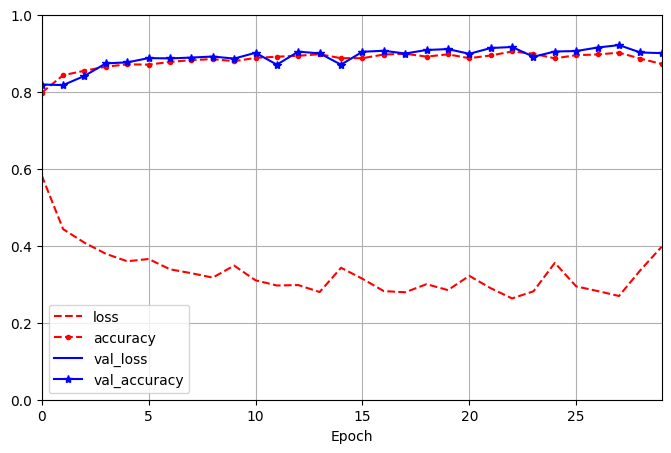

In [12]:
#Step 1 - Import the data
#Also split the data into training and test sets, also hold out the last 5000 images from training/testing
fashionMnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashionMnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[:-5000], y_train_full[:-5000]

#Step 2 - Create the neural net structure
#get_layer() and get_weights() to see layers and weight
tf.random.set_seed(42)
model2_1 = tf.keras.Sequential()
model2_1.add(tf.keras.layers.InputLayer(input_shape=[28, 28]))
model2_1.add(tf.keras.layers.Flatten())
model2_1.add(tf.keras.layers.Dense(300, activation="relu"))
#batch normalization layer moved and moved another hidden layer between batch and dropout
model2_1.add(tf.keras.layers.BatchNormalization())
model2_1.add(tf.keras.layers.Dense(250, activation="relu"))
model2_1.add(tf.keras.layers.Dense(200, activation="relu"))
#dropout layer moved
model2_1.add(tf.keras.layers.Dropout(.2))
#more hidden layers
model2_1.add(tf.keras.layers.Dense(150, activation="relu"))
#added this layer
model2_1.add(myLayer)
model2_1.add(tf.keras.layers.Dense(50, activation="relu"))
model2_1.add(tf.keras.layers.Dense(10, activation="softmax"))

model2_1.summary()

#Custom loss function
def lossFunc(y_true, y_pred):
    # Calculate cross-entropy loss
    cross_entropy = tf.keras.losses.CategoricalCrossentropy(from_logits=True)(y_true, y_pred)

    # Define the regularization term (L2 weight decay)
    l2_weight_decay = 0.001  # Adjust this value as needed
    regularization_loss = tf.reduce_sum(tf.keras.regularizers.l2(l2_weight_decay)(model.trainable_variables))

    # Combine losses with weights
    total_loss = cross_entropy + regularization_loss * 0.1  # Adjust weight (0.1)

    return total_loss

#Step 3 - Compile the model
#edited learning rate to .05 instead of .01
model2_1.compile(loss="sparse_categorical_crossentropy", optimizer = "adam", metrics=["accuracy"])

#Step 4 - Train and evaluate model
history2_1 = model2_1.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

#Step 5 - Check for overfitting and retest if needed (STOP HERE BASED ON ASSIGNMENT REQS)
mse_test, rmse_test = model2_1.evaluate(X_test, y_test)

#Step 6 - Visualize the data
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history2_1.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.show()

Test 1: Adding an extra layer and changing the learning rate to .05 seems to have made the model MORE overfitted than before so I will try to increase the learning rate and see if that leads to more or less overfitting.